# CLASE 7 - Visualizaciones en python I
### Coderhouse - Data Science
Profe Omar Muñoz

In [ ]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Interfaz orientada a objetos
fig, ax = plt.subplots() # crea el objeto del grafico
ax.plot([1, 3], [2, 4]) # grafica una linea

In [ ]:
mpl.style.use('bmh') # define un estilo para todo el notebook

> Acá puedes encontrar más estilos:
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

Repitamos la grafica previa con este nuevo estilo

In [ ]:
fig, ax = plt.subplots()
ax.plot([1, 3], [2, 4])

In [ ]:
fig, ax = plt.subplots()
ax.plot([1, 3], [2, 4])
# le asignamos al objeto nuevas propiedades
ax.set_xlabel("Unidades X") # nombre del eje X
ax.set_ylabel("Unidades Y") # nombre del eje Y
ax.set_title("Título") # título
ax.legend(['Leyenda']) # Muestra la leyenda y le asigna un nombre

In [ ]:
# Cargamos los datos
df_lluvias = pd.read_csv('pune_1965_to_2002.csv')
df_lluvias.head()

In [ ]:
# Asignamos un year como un indice
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias

In [ ]:
# Asignamos los datos que queremos graficar
x = df_lluvias.index
y = df_lluvias.sum(axis='columns')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4)) # (6, 6) # figsize es el tamaño de la figura (ancho, alto)
ax.plot(x, y, label='Precipitaciones acumuladas')
ax.set_xlabel('Año') 
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año')
ax.legend() #loc='upper right' #'lower center' #best #'right'

In [ ]:
# PRO TIP
ax.legend?

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Precipitaciones acumuladas')
ax.set_xlabel('Año') 
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año')
ax.legend()
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1]) # límites del eje x
#ax.set_ylim(0, 2100) # límites del eje y

In [ ]:
fig.savefig("precipitaciones_año.pdf") # guardar figura en pdf

In [ ]:
fig.savefig("precipitaciones_año.png") # guardar figura en png

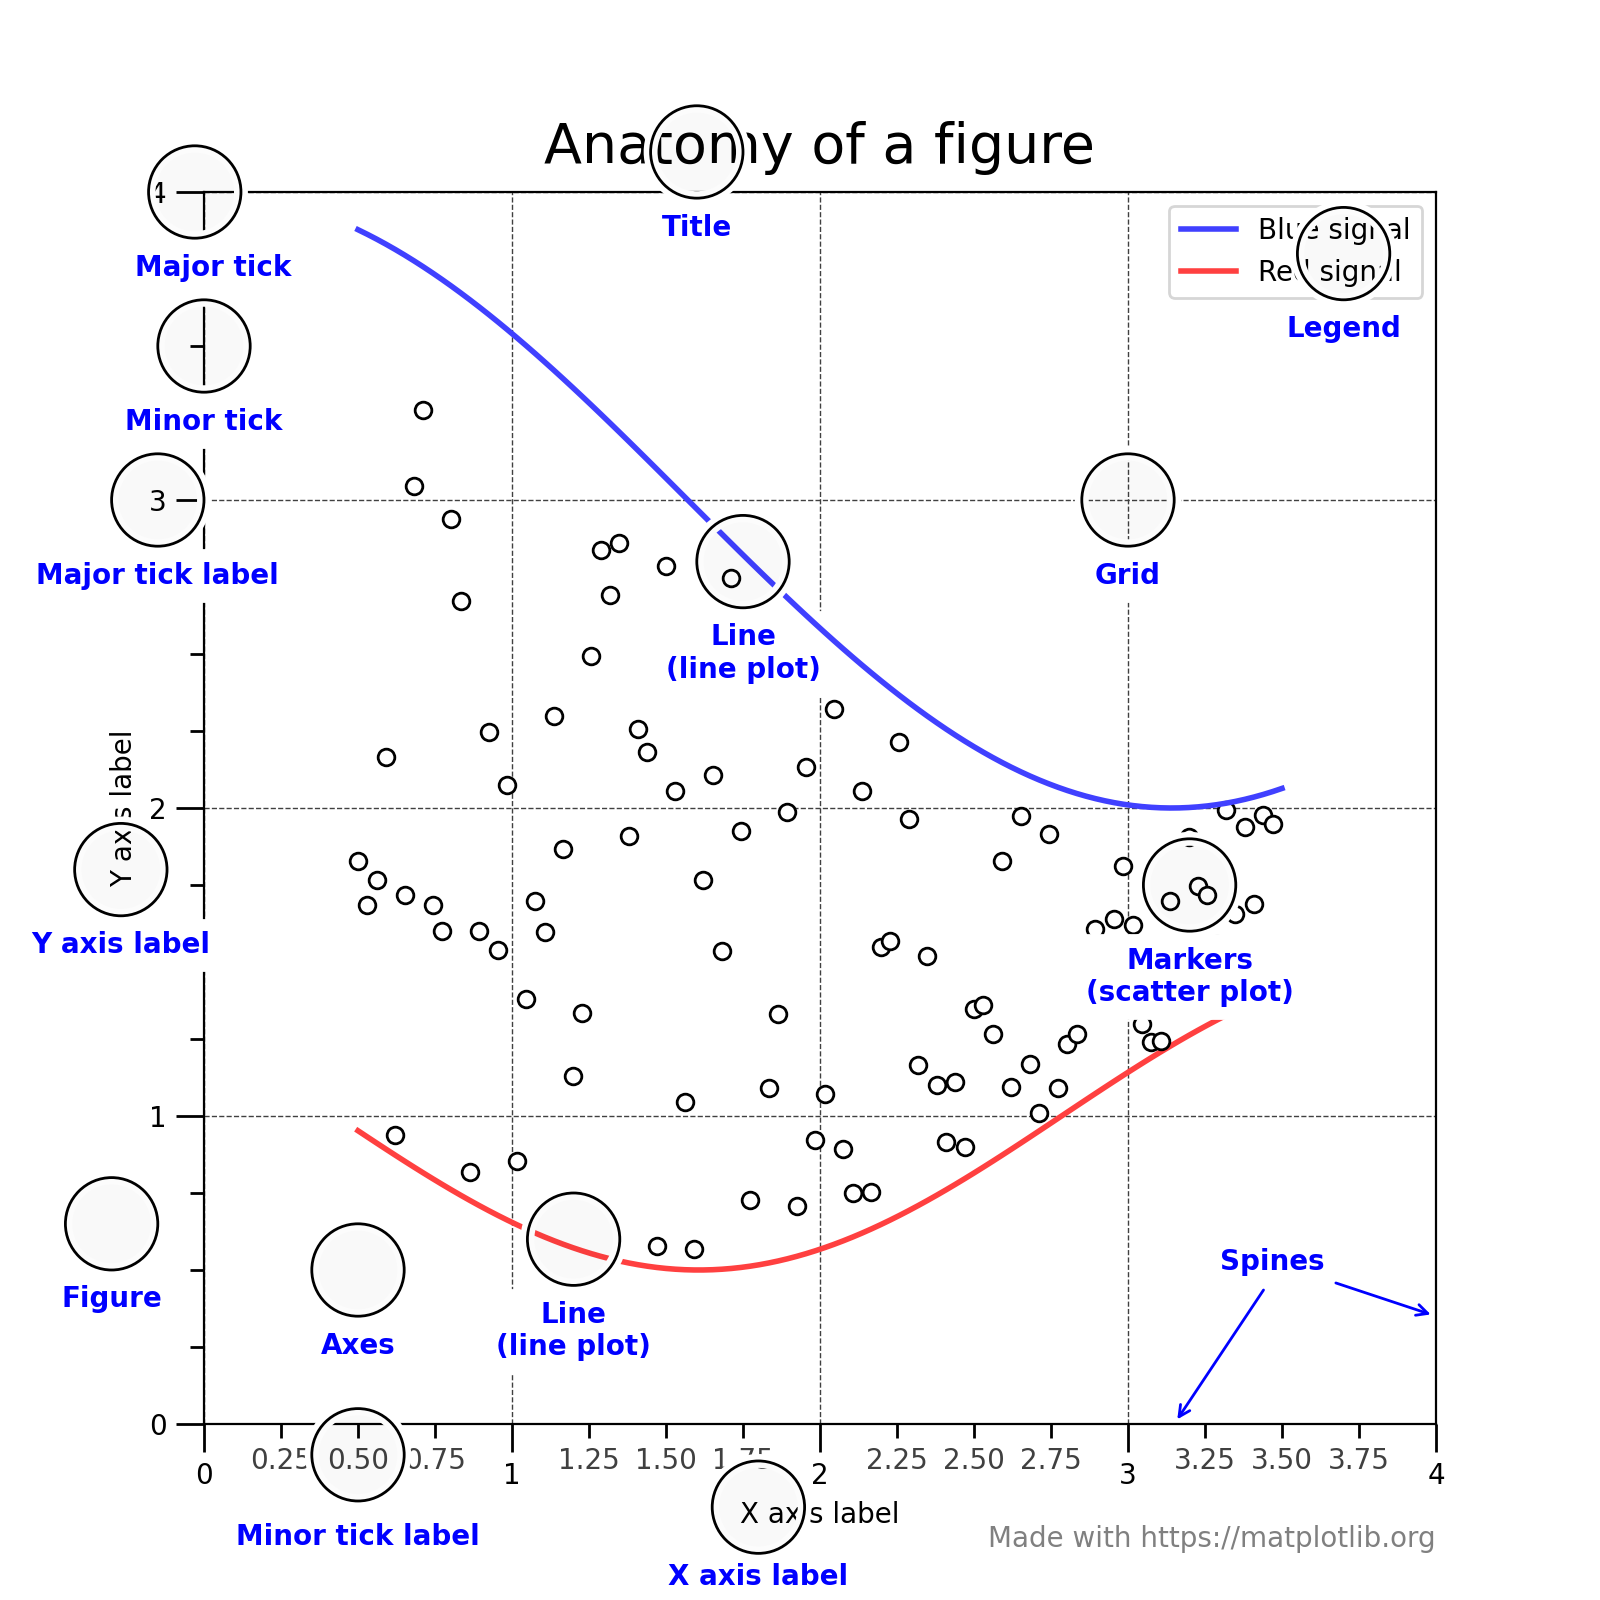

## Ejemplos premier league

In [ ]:
df = pd.read_csv("df_full_premierleague.csv", index_col=0)
df.head()

In [ ]:
# Convertimos la columna date a formato fecha
df['date'] = pd.to_datetime(df['date'])

# Creamos una columna con los puntos por partido de local
df.home_points = 0
# Asignamos 3 puntos al local cuando anota más goles que el visitante
df.loc[df['goal_home_ft'] > df['goal_away_ft'], 'home_points'] = 3 
# Asignamos 1 puntos al local cuando anota lo mismo que el visitante
df.loc[df['goal_home_ft'] == df['goal_away_ft'], 'home_points'] = 1
# Asignamos 0 puntos al local cuando anota menos goles que el visitante
df.loc[df['goal_away_ft'] > df['goal_home_ft'], 'home_points'] = 0

# Creamos una columna con los puntos por partido de visitante
df.away_points = 3
df.loc[df['goal_home_ft'] > df['goal_away_ft'], 'away_points'] = 0
df.loc[df['goal_home_ft'] == df['goal_away_ft'], 'away_points'] = 1
df.loc[df['goal_away_ft'] > df['goal_home_ft'], 'away_points'] = 3

# Creamos una columna con los puntos por partido totales
df['total_points'] = df['home_points'] + df['away_points']

# Gráficos de líneas

In [ ]:
# Filtrar los partidos del Liverpool de local y de visitante
Liverpool = df[(df['season']=='18/19')&
               ((df['home_team']=='Liverpool')|
                (df['away_team']=='Liverpool'))][['date', 'total_points']].sort_values(by="date") # ordenarlos por fecha

# Filtrar los partidos del City de local y de visitante
City = df[(df['season']=='18/19')&
          ((df['home_team']=='Manchester City')|
           (df['away_team']=='Manchester City'))][['date', 'total_points']].sort_values(by="date")# ordenarlos por fecha

In [ ]:
# Calcular la suma acumulada de las series
Liverpool['acum'] = Liverpool['total_points'].cumsum()
City['acum'] = City['total_points'].cumsum()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6)) 
ax.plot(City['date'], City['acum'], 'o-',label = 'Manchester City')
ax.plot(Liverpool['date'], Liverpool['acum'],'o-', label='Liverpool')
plt.xticks(rotation=90) # Rota los nombres 90 grados
ax.set_xlabel('Equipo visitante') 
ax.set_title('Puntos acumulados temporada 18/19 - Liverpool vs Manchester City')
ax.legend()

# Gráficos de puntos

### Relación fuerte

In [ ]:
# Seleccionamos las variables de posesión y pases en las temporadas de Guardiola
guardiola = ['16/17', '17/18', '18/19'] # lista para realizar filtro
posesion_g = df[(df['season'].isin(guardiola))&(df['home_team']=='Manchester City')]['home_possession']
pases_g = df[(df['season'].isin(guardiola))&(df['home_team']=='Manchester City')]['home_passes']
# Seleccionamos las variables de posesión y pases en las temporadas de Pellegrini
pellegrini = ['13/14', '14/15', '15/16']
posesion_p = df[(df['season'].isin(pellegrini))&(df['home_team']=='Manchester City')]['home_possession']
pases_p = df[(df['season'].isin(pellegrini))&(df['home_team']=='Manchester City')]['home_passes']

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
# por cada "scatter" que se agregue se gráfica una línea
ax.scatter(posesion_g, pases_g, alpha=0.7) 
ax.scatter(posesion_p, pases_p, alpha=0.7)
ax.set_title('Manchester City de local')
ax.set_xlabel('% de posesión del balón')
ax.set_ylabel('No. de pases por partido')
ax.legend(['Guardiola', 'Pellegrini'], loc='upper left')

### Relación débil

In [ ]:
guardiola = ['16/17', '17/18', '18/19'] # Creamos una lista con las temporadas de Guardiola
# Creamos una serie que guarde los datos que cumplen 2 condiciones:
# 1) que las temporadas esten en la lista y 2) que el equipo de local sea el Man. City
posesion_g = df[(df['season'].isin(guardiola))&(df['home_team']=='Manchester City')]['home_possession']
goles_g = df[(df['season'].isin(guardiola))&(df['home_team']=='Manchester City')]['goal_home_ft']

pellegrini = ['13/14', '14/15', '15/16'] # Creamos una lista con las temporadas de Guardiola
posesion_p = df[(df['season'].isin(pellegrini))&(df['home_team']=='Manchester City')]['home_possession']
goles_p = df[(df['season'].isin(pellegrini))&(df['home_team']=='Manchester City')]['goal_home_ft']

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(posesion_g, goles_g, alpha=0.7)
ax.scatter(posesion_p, goles_p, alpha=0.7)
ax.set_title('Manchester City de local')
ax.set_xlabel('% de posesión del balón')
ax.set_ylabel('No. de goles por partido')
ax.legend(['Guardiola', 'Pellegrini'], loc='upper left')

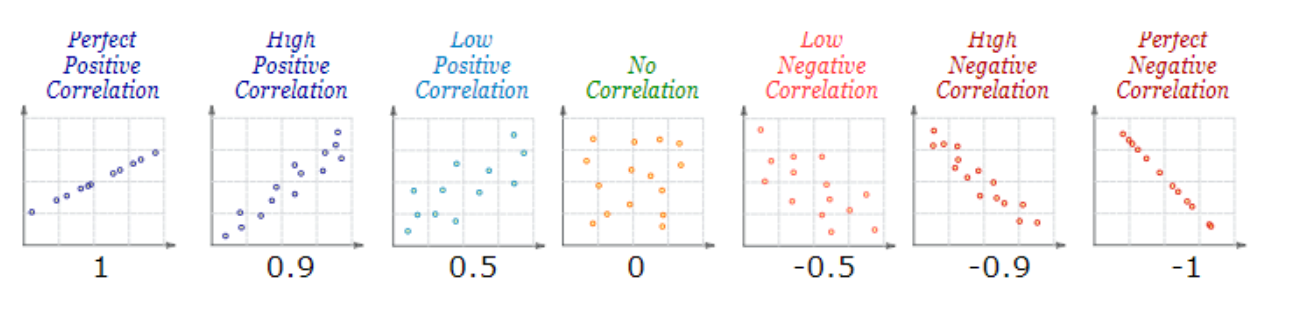

# Gráficos de barras

In [ ]:
equipos = df[(df['season']=='18/19')&(df['home_team']=='Liverpool')]['away_team']
disparos = df[(df['season']=='18/19')&(df['home_team']=='Liverpool')]['home_shots']
disparosPuerta = df[(df['season']=='18/19')&(df['home_team']=='Liverpool')]['home_shots_on_target']
goles = df[(df['season']=='18/19')&(df['home_team']=='Liverpool')]['goal_home_ft']

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6)) 
ax.bar(equipos, disparos, label = 'Disparos totales', width = 0.75) # width es el ancho de la barra
ax.bar(equipos, disparosPuerta, label = 'Disparos a puerta', width = 0.5)
ax.bar(equipos, goles, label = 'Goles', width = 0.25)
plt.xticks(rotation=90) # Rota los nombres 90 grados
ax.set_xlabel('Equipo visitante') 
ax.set_title('Liverpool de local - 18/19')
ax.legend()

# Histograma

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df.goal_home_ft)
ax.set_title('Histograma goles de local Premier League')
ax.set_xlabel('Cantidad de goles de local')
ax.set_ylabel('Frecuencia absoluta')

También se puede usar para comparar

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df[df['home_team']=='Arsenal']['home_passes'], label = 'Arsenal', bins=30)
ax.hist(df[df['home_team']=='Aston Villa']['home_passes'], label = 'Aston Villa', bins=30)
ax.set_title('Histograma pases equipos Premier League')
ax.set_xlabel('Cantidad de pases de local')
ax.set_ylabel('Frecuencia absoluta')
ax.legend()

# Enriqueciendo visualizaciones

### Líneas o bandas

In [ ]:
fig, ax = plt.subplots(figsize=(8, 12)) 
ax.barh(equipos, disparosPuerta, label = 'Disparos a puerta')
ax.set_ylabel('Equipo visitante') 
ax.set_title('Liverpool de local - 18/19')
# vlines se usa para líneas verticales
# linestyle es el estilo de la línea, por defecto es continuo
# alpha es la transparencia de la línea
# linewidth es el ancho de la línea
ax.vlines(disparosPuerta.mean(), ymin = -1, ymax = 19, color='green', linestyle='--', alpha=0.5, linewidth=3, label='Promedio')
ax.vlines(disparosPuerta.mean()+disparosPuerta.std(), ymin = -1, ymax = 19, color='green', linestyle='--', alpha=0.5, linewidth=3, label='Promedio+std')
ax.vlines(disparosPuerta.mean()-disparosPuerta.std(), ymin = -1, ymax = 19, color='green', linestyle='--', alpha=0.5, linewidth=3, label='Promedio-std')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8)) 
ax.bar(equipos, goles, label = 'Disparos a puerta')
ax.set_ylabel('Equipo visitante') 
ax.set_title('Liverpool de local - 18/19')
# axhline se usa para líneas horizontales
ax.axhline(goles.mean(), color='green', linestyle=':', alpha=0.5, linewidth=3, label='Promedio')
ax.axhline(goles.mean()+goles.std(), color='green', linestyle=':', alpha=0.5, linewidth=3, label='Promedio+std')
ax.axhline(goles.mean()-goles.std(), color='green', linestyle=':', alpha=0.5, linewidth=3, label='Promedio-std')
plt.xticks(rotation=90)
ax.legend()